In [1]:
%load_ext autoreload
%autoreload 2

In [213]:
%matplotlib inline
import lasagna.pipelines._20161010_NGS
reload(lasagna.pipelines._20161010_NGS)
from lasagna.pipelines._20161010_NGS import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', font_scale=1.5)
from IPython.display import display
from natsort import natsorted

In [3]:
cd /Users/feldman/TimeMachine

/Users/feldman/TimeMachine


### prepare data

In [5]:
# make_csvs()
df_samples, df, sample_info, target_info, target_table, df_fcs = load_csvs()

In [240]:
display_ind_var(df, 'target', run='20161012_JDB_AJG')

col,1,2,3,4,5,6,7,8,9,10,11,12
row,,,,,,,,,,,,
A,T9,T10,None,T12,T13,T14,T12,None,T14,T9,None,T11
B,T9,T10,None,T12,T13,T14,T9,T10,T11,None,T13,T14
C,T9,T10,None,T12,T13,T14,T12,T13,T14,T9,T10,T11
D,T9,T10,None,T12,T13,T14,T9,T10,T11,T12,T13,T14
E,T9,None,None,T12,T13,T14,T9,T10,T11,T12,T13,T14
F,T9,None,None,T12,T13,T14,None,None,None,T12,T13,T14
G,T9,None,None,T12,T13,T14,T9,None,None,T12,T13,None
H,T9,None,None,T12,T13,T14,T9,None,None,T12,None,None


### view targets

In [271]:
cols = tuple(target_table.filter(regex='sgV').columns)
cols = ('formatted_alignment', 'sgRNA') + cols
display_table(target_table.drop_duplicates('sgRNA'), 
              cols=cols, filename='target_table.html')


### summarize flow

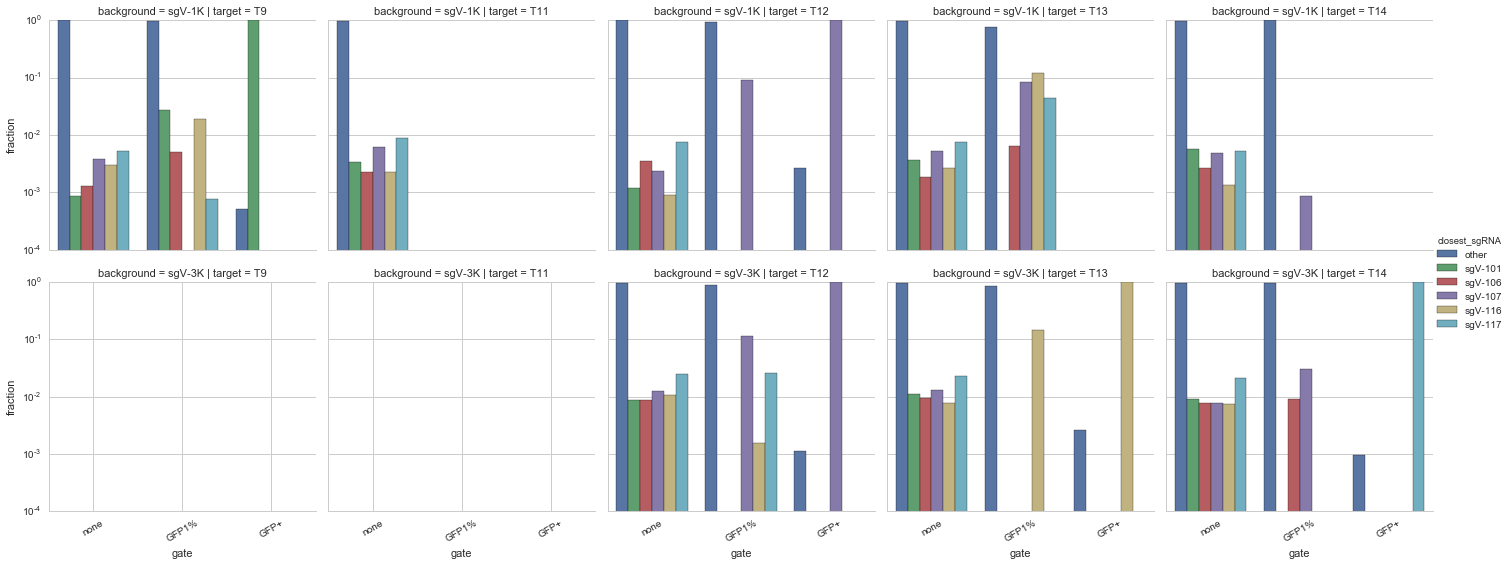

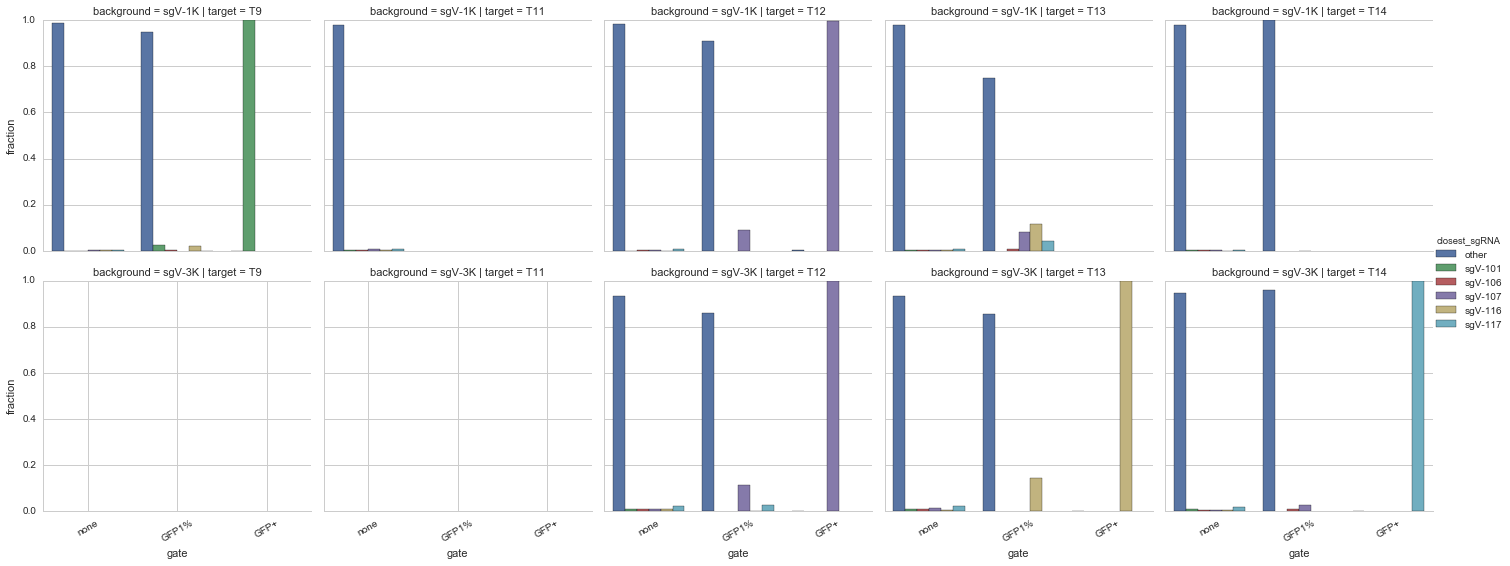

In [234]:
for yscale in ('log', 'linear'):
    fg = plot_enrichments(df, yscale=yscale)
    fg.fig.savefig('figures/enrichments_%s.pdf' % yscale)

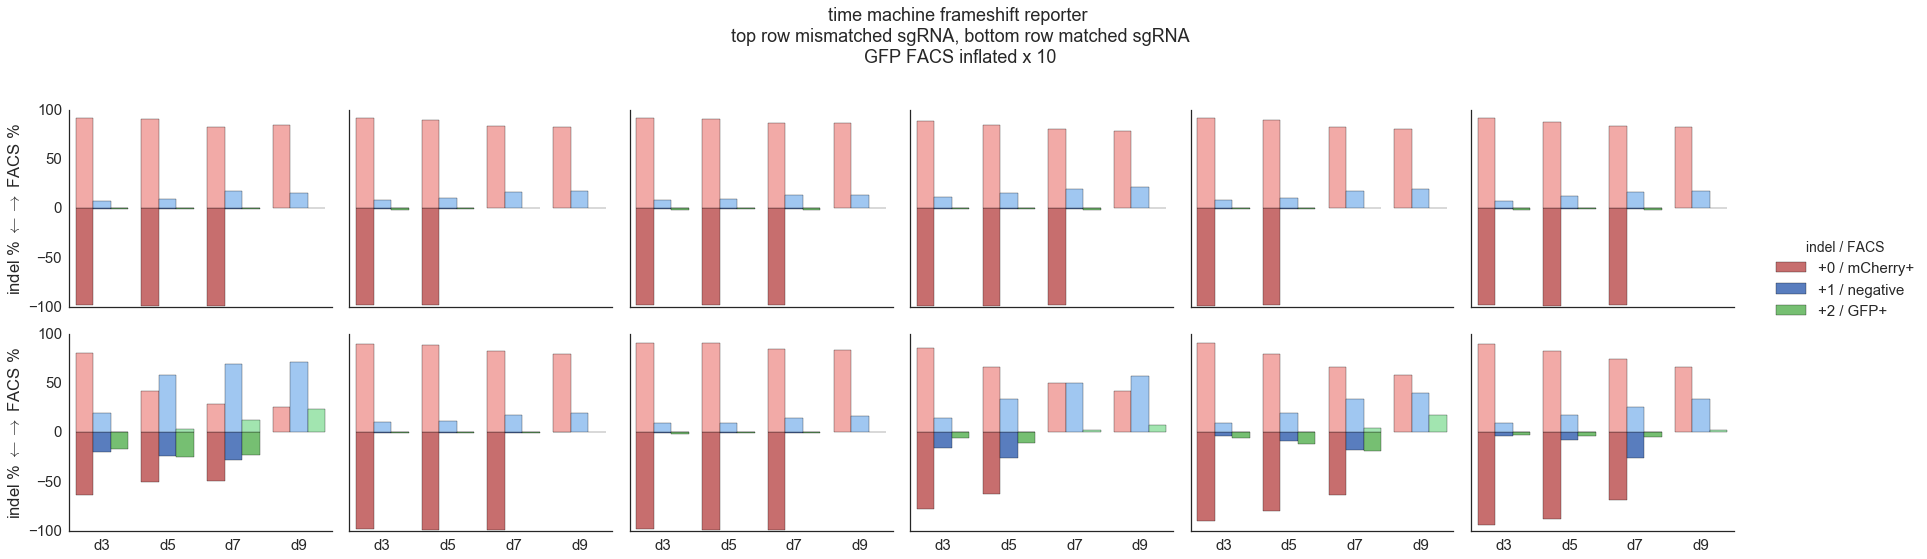

In [232]:
filt = 'row=="A" | row == "B"'
fg = plot_waterfall(df.query(filt), df_fcs.query(filt), inflate_GFP=10)

fg.fig.savefig('figures/indel_FACS.pdf')

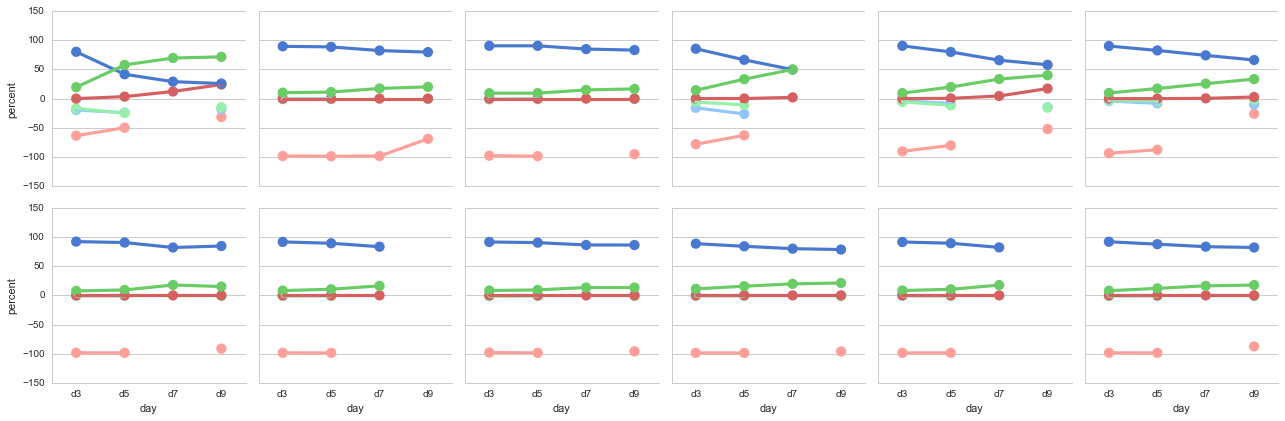

In [220]:
fg = plot_pointplot(df, df_fcs, inflate_GFP=10)

fg.fig.tight_layout()

In [84]:
def jaccard_counts(a, b, threshold=20):
    a = a[a['count'] > threshold]
    b = b[b['count'] > threshold]
    num = pd.merge(a,b,on='match', how='inner')
    num = num['count_x'].sum() + num['count_y'].sum()
    den = a['count'].sum() + b['count'].sum()
    return num / float(den)

df_j = calculate_pairwise(df, func=jaccard)
df_c = calculate_pairwise(df, func=jaccard_counts)

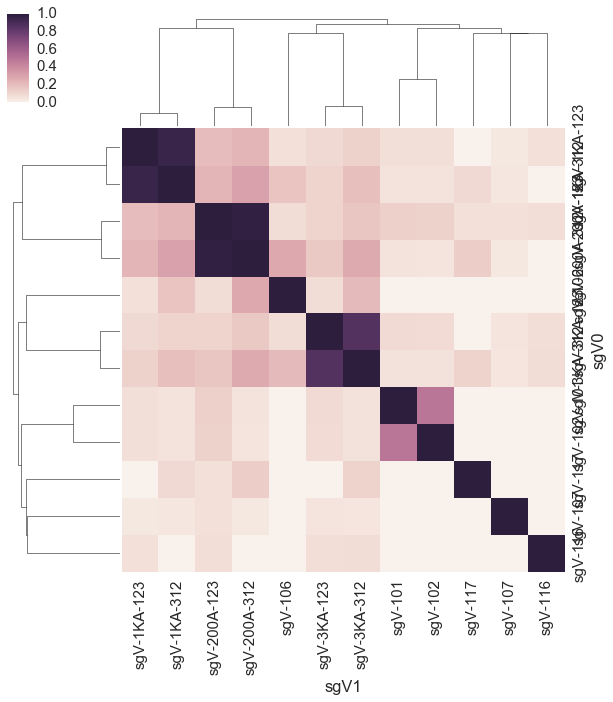

In [85]:
sns.clustermap(df_c)

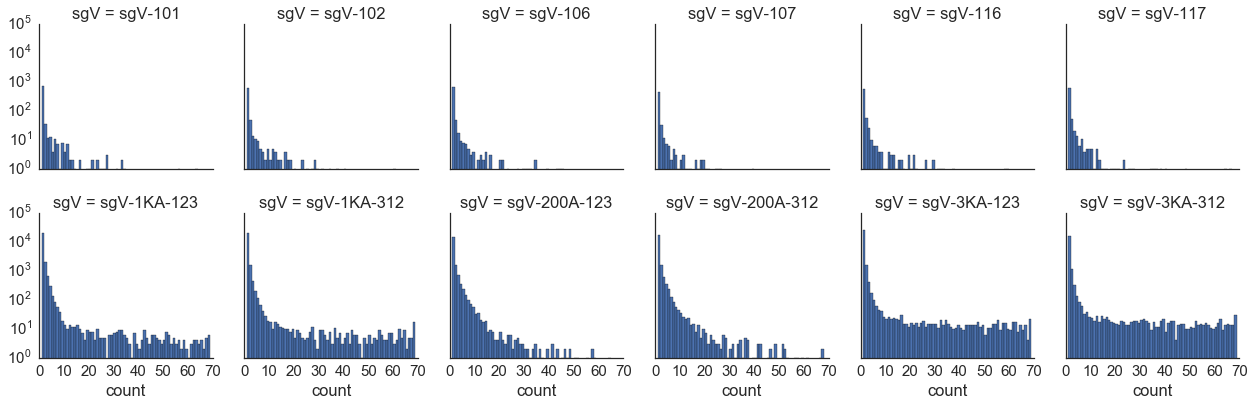

In [191]:
fg = sns.FacetGrid(df, col='sgV', col_wrap=6, col_order=np.unique(df['sgV']))
fg.map(plt.hist, 'count', bins=range(70))
fg.axes.flat[0].set_yscale('log')
fg.fig.savefig('match_frequencies.pdf')